
![](imgs/regions.jpg)

# Get latest data link

In [1]:
import requests
from bs4 import BeautifulSoup


url = 'https://www.mwra.com/biobot/biobotdata.htm'
data_url = ''
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text, 'html.parser')

urls = []
for link in soup.find_all('a'):
    #print('trick')
    this_link=link.get('href')
    if (this_link != None):
        #print(link.get('href'))
        if (this_link.find('-data') != -1):
            #print("got it!")
            data_url='https://www.mwra.com/biobot/'+this_link

if len(data_url)>0:
    print("got data url!",data_url)
else:
    print("no data url found")


got data url! https://www.mwra.com/biobot/MWRAData20220301-data.pdf


# Import data

- [MWRA graphs](https://www.mwra.com/biobot/biobotdata.htm)
- [MWRA original data in pdf form](https://www.mwra.com/biobot/MWRAData20220212-data.pdf)

In [2]:
# https://theautomatic.net/2019/05/24/3-ways-to-scrape-tables-from-pdfs-with-python/
# https://camelot-py.readthedocs.io/en/master/user/install-deps.html#install-deps
import camelot 

#file = "https://www.mwra.com/biobot/MWRAData20220218-data.pdf"

tables = camelot.read_pdf(data_url, pages = "1-end")

In [3]:
import pandas as pd

In [4]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

frames=[]
for i in range(0,len(tables)):
    frames.append(tables[i].df)
    

In [27]:
headers=frames[0].iloc[0]
headers

0                               Sample Date
1                    Southern \n(copies/mL)
2                    Northern \n(copies/mL)
3                      Southern \n7 day avg
4                      Northern \n7 day avg
5      Southern \nLow Confidence \nInterval
6     Southern \nHigh Confidence \nInterval
7      Northern \nLow Confidence \nInterval
8     Northern \nHigh Confidence \nInterval
9                Southern \nVariant Results
10             Northern \nVariant \nResults
Name: 0, dtype: object

In [28]:
df = pd.concat(frames)

In [29]:
#new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
#df.columns = new_header #set the header row as the df header
df.columns = ['Date','Southern','Northern','Southern_7','Northern_7','Southern_low','Southern_high','Northern_low','Northern_high','Southern_variant','Northern_variant']

In [30]:
df

,Date,Southern,Northern,Southern_7,Northern_7,Southern_low,Southern_high,Northern_low,Northern_high,Southern_variant,Northern_variant
1,3/1/2020,,,,,,,,,,
2,3/2/2020,,,,,,,,,,
3,3/3/2020,,,,,,,,,,
4,3/4/2020,,,,,,,,,,
5,3/5/2020,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
33,3/15/2022,,,,,,,,,,
34,3/16/2022,,,,,,,,,,
35,3/17/2022,,,,,,,,,,
36,3/18/2022,,,,,,,,,,


convert column to timestamp:
[https://stackoverflow.com/questions/50089903/convert-column-to-timestamp-pandas-dataframe](https://stackoverflow.com/questions/50089903/convert-column-to-timestamp-pandas-dataframe)




In [31]:
#d1=pd.to_datetime(df.Date)
#d2=pd.to_datetime(d1,unit='ms',origin='unix')
unixtime=pd.to_datetime(df.Date).astype(int) / 10**9
df.insert(0, "timestamp", unixtime, True)
df

,timestamp,Date,Southern,Northern,Southern_7,Northern_7,Southern_low,Southern_high,Northern_low,Northern_high,Southern_variant,Northern_variant
1,1.583021e+09,3/1/2020,,,,,,,,,,
2,1.583107e+09,3/2/2020,,,,,,,,,,
3,1.583194e+09,3/3/2020,,,,,,,,,,
4,1.583280e+09,3/4/2020,,,,,,,,,,
5,1.583366e+09,3/5/2020,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
33,1.647302e+09,3/15/2022,,,,,,,,,,
34,1.647389e+09,3/16/2022,,,,,,,,,,
35,1.647475e+09,3/17/2022,,,,,,,,,,
36,1.647562e+09,3/18/2022,,,,,,,,,,


In [9]:

region = 'Northern'
dates=df['Date'].to_numpy()
counts=df[region].to_numpy()

length = len(dates)
tail_length=100

dates_end=dates[(length-tail_length):]
counts_end=counts[(length-tail_length):]

dates_initial=dates[:tail_length]
counts_initial=counts[:tail_length]

# To CSV

In [10]:
#compression_opts = dict(method='zip',archive_name='out.csv')
#df.to_csv('out.zip', index=False,compression=compression_opts)
df.to_csv('test.csv',index=False)

In [11]:
#https://stackoverflow.com/questions/9627686/plotting-dates-on-the-x-axis-with-pythons-matplotlib

import matplotlib.pyplot as plt
import datetime as dt

#x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]
x=[]
y=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    this_count = counts[i]
    if (len(this_count)>0) and (len(this_count.split(" "))==1):
        if (len(this_date.split(" "))==1):
            d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
            x.append(d)
            y.append(int(this_count))



# Full range

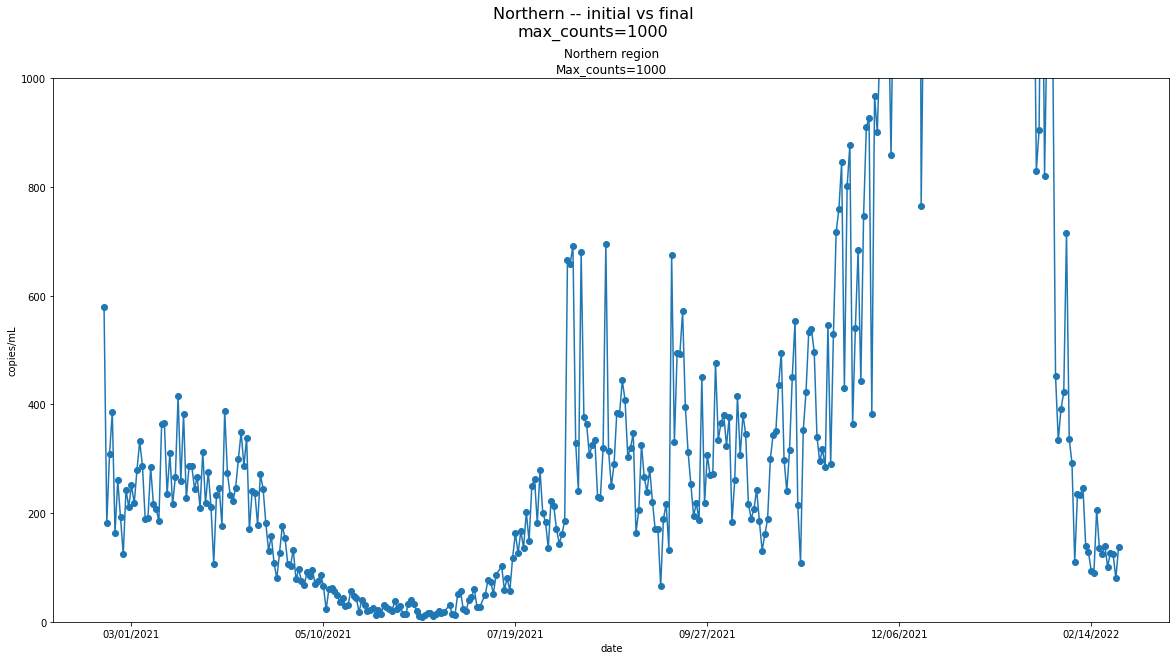

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=1000

# plot intial
#plt.subplot(1, 2, 1)
plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
#plt.plot(x,y,'-o')
plt.ylim([0,max_counts])
plt.ylabel('copies/mL')
plt.xlabel('date')
plt.title(region+' region\nMax_counts='+str(max_counts))
#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 10)
fig.suptitle(region +' -- initial vs final\nmax_counts='+str(max_counts), fontsize=16)

filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
plt.savefig('graphs/'+filename)
plt.show()

In [ ]:
#import pandas as pd
#import numpy as np
%matplotlib inline

# some sample data
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000)).cumsum()

#plot the time series
ts.plot(style='k--')

# calculate a 60 day rolling mean and plot
ts.rolling(window=60).mean().plot(style='k')

# add the 20 day rolling standard deviation:
ts.rolling(window=20).std().plot(style='b')

# Export CSV

In [75]:
import csv
from itertools import zip_longest

filename = "data/MWRAData20220212_"+region+".csv"

list1 = x
list2 = y
d = [list1, list2]
export_data = zip_longest(*d, fillvalue = '')
with open(filename, 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("date", "copies_per_mL"))
      wr.writerows(export_data)
myfile.close()

# Side-by-side

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=2))

max_counts = 1000
head=400
tail=300

# plot intial
plt.subplot(1, 2, 1)
plt.plot(x[0:head],y[0:head],'-o')
plt.ylim([0,max_counts])
plt.ylabel('copies/mL')
plt.xlabel('date')
plt.title(region + '-- initial')

# plot final
plt.subplot(1, 2, 2)

plt.plot(x[(len(x)-tail):],y[(len(x)-tail):],'-o')
plt.ylim([0,max_counts])
plt.ylabel('copies/mL')
plt.xlabel('date')
plt.title(region + '-- final')

fig = plt.gcf()
fig.set_size_inches(20, 10)
fig.suptitle(region +' -- initial vs final\nmax_counts='+str(max_counts), fontsize=16)

filename=region+'_limit_'+str(max_counts)+'.pdf'
plt.savefig('graphs/'+filename)
plt.show()

# Variants

![](imgs/headers.png)
![](imgs/ba2.png)


In [60]:
# https://stackoverflow.com/questions/17704244/writing-python-lists-to-columns-in-csv

# Getting links from MWRA